In [1]:
from Cryptodome.Cipher import AES

In [2]:
import os as os
key = os.urandom(32)
print(str(key))

b'\n\xd0\xd3V\xe1\x06,2\xf1\xca\xb2{y\x1aSH\xc1^\x16\xbd\xc2\xf6F\x9fO!+\xef>\xa6B\xea'


In [3]:
cipher = AES.new(key, AES.MODE_CFB)
msg = cipher.iv + cipher.encrypt(b'Now is the time for all good men to come to the aid of their country.')
msg +=cipher.encrypt(b' Additional text here.')
print(str(msg))

b'\xd0\xa0g,+B\xff\x84\xd8jnV\xd9\xca\x03\xa4 \xfc\xf3\xf6\xc4\xa0\xd1[}\xb7{{\xc4{\x0ey\x86\xd3\xf8\xf3\x95f\xc9\x9f\x9c\x8b;\xc9\xed\x89\xd2\x15\xe7\xce\xa6\xbdp\x91\x98\xed\x0c\xf6\xbc\x9d\xd7X\x9b?waQ\xd2f\xc6\x1f\xc7h*\xd0\xee\xb2\xb6!\xb50\x98B\xdd\xd1\xeebZ\x9c\xdc2\xe0V\x97\xa41\x06()\xf4\xfb\xcb\x86\xbe\xd7\xa5\x15'


In [4]:
decryptor = AES.new(key, AES.MODE_CFB)
result = decryptor.decrypt(msg)
print(result)

b'\xdb\x05\xad\xc3\x8d\xbbnQe\x82X\x03\xbe<\\\x89Now is the time for all good men to come to the aid of their country. Additional text here.'


In [5]:
print (result[16:])

b'Now is the time for all good men to come to the aid of their country. Additional text here.'


In [6]:
print(str(decryptor.decrypt(msg[16:])))

b'v\x8a\xa3\xde\x10\x8fa\xe6\x11\xff\xca\x8f\x92\xa2V\xc5for all good men to come to the aid of their country. Additional text here.'


In [7]:
from encrypcheckutil import *

In [8]:
toencrypt=open('tests/Encrypt test document.odt','rb')
print('Encrypting: '+toencrypt.name)
encrypted = AESencrypt(toencrypt, 'Encrypt test document.odt', key)
filename = encrypted.name
encrypted.close()
print('Encryption complete. Naming file to "Encrypt test document.odt.AES".')
os.rename(filename,'Encrypt test document.odt.AES')
print('Done.')

Encrypting: tests/Encrypt test document.odt
Encryption complete. Naming file to "Encrypt test document.odt.AES".
Done.


In [9]:
todecrypt = open('Encrypt test document.odt.AES','rb')
print('Decrypting: '+todecrypt.name)
decrypted = AESdecrypt(todecrypt,key)
filename = decrypted.name
decrypted.close()
print('Decryption complete. Naming file to "Encrypt test document.odt.AES.dcy".')
os.rename(filename,'Encrypt test document.odt.AES.dcy')
print('Done')

Decrypting: Encrypt test document.odt.AES
Decryption complete. Naming file to "Encrypt test document.odt.AES.dcy".
Done


In [10]:
values = slurpfilebytesasarray("Encrypt test document.odt.AES.dcy")
x,y = rmsdevautocorr(values)

Reading file: Encrypt test document.odt.AES.dcy
File size: 33938


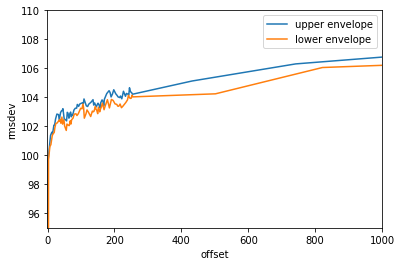

In [14]:
import matplotlib.pyplot as plt
upperenvx, upperenvy, lowerenvx, lowerenvy=envelope(x,y)
plt.ylabel('rmsdev')
plt.xlabel('offset')
plt.plot(upperenvx,upperenvy,'-',label='upper envelope')
plt.plot(lowerenvx,lowerenvy,'-',label='lower envelope')
plt.legend()
plt.axis([-1,1000,95,110])
plt.show()

In [15]:
print(str(np.mean(upperenvy[1:])))
print (str(np.mean(lowerenvy[1:])))

105.393655142
104.926183654


In [21]:
print(str(upperenvx[50]))
print(str(np.mean(upperenvy[1:50])))
print (str(np.mean(lowerenvy[1:50])))

154.0
102.889965938
102.437641804


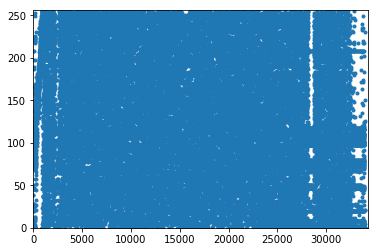

In [22]:
plt.axis([0,(len(values)*1.01),0,256])
plt.plot(values,'.')
plt.show()

In [23]:
values = slurpfilebytesasarray("Encrypt test document.odt.AES")
x,y = rmsdevautocorr(values)

Reading file: Encrypt test document.odt.AES
File size: 33954


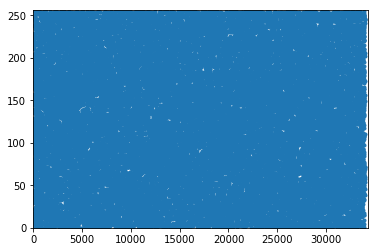

In [24]:
plt.axis([0,(len(values)*1.01),0,256])
plt.plot(values,'.')
plt.show()

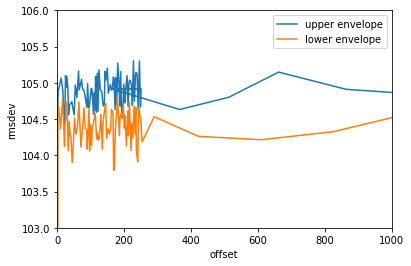

In [28]:
upperenvx, upperenvy, lowerenvx, lowerenvy=envelope(x,y)
plt.ylabel('rmsdev')
plt.xlabel('offset')
plt.plot(upperenvx,upperenvy,'-',label='upper envelope')
plt.plot(lowerenvx,lowerenvy,'-',label='lower envelope')
plt.legend()
plt.axis([-1,1000,103,106])
plt.show()

In [29]:
print(str(np.mean(upperenvy[1:])))
print (str(np.mean(lowerenvy[1:])))

104.896095521
104.424395348


In [30]:
print(str(upperenvx[50]))
print(str(np.mean(upperenvy[1:50])))
print (str(np.mean(lowerenvy[1:50])))

150.0
104.828913954
104.388855719


In [31]:
print(str(upperenvx[10]))
print(str(np.mean(upperenvy[1:10])))
print (str(np.mean(lowerenvy[1:10])))

29.0
104.814409574
104.498078782


In [32]:
print(str(np.mean(y[1:])))
print(str(np.mean(y[1:29])))

104.67269968
104.694552134
